# Working with audio in Jupyter

<i>Adapted from Jakob Abesser's notebooks <a href="https://machinelistening.github.io"></i>

This notebook provides basic examples for loading, displaying, and listening to audio files.

In [2]:
import numpy as np
import os
import matplotlib
import librosa
import librosa.display
import matplotlib.pyplot as pl
import IPython.display as ipd

## Loading audio files


In [3]:
# 1) define path to the directory that contains the audio files (WAV format)
# TIP: under Windows, it is also recommended to use '/', e.g. 'C:/my_audio_files'
dir_wav = ''  # here, we use the same directory as the notebook is in

# this could also look like
# dir_wav = 'c:/audio_files'

# 2) create absolute path of audio file (directory + filename)
# os.path.join takes care of the correct delimiter signs
# - Linux / MacOSx: "/"
# - Windows: "\\"

fn_wav = os.path.join(dir_wav, 'bird.wav')  # original filename: 416529__inspectorj__bird-whistling-single-robin-a_2s
print(fn_wav)

bird.wav


Librosa is a Python library for audio processing. You can check the documentation for its loading function here: https://librosa.org/doc/main/generated/librosa.load.html

Let us load our wave file here. We will learn about sample rates later:

In [4]:
# (1) use the sample rate of the file, load stereo if needed
x, fs = librosa.load(fn_wav)

print("Sample vector shape:", x.shape)  # 1D numpy array, mono
print("Sample rate [Hz]", fs)

Sample vector shape: (45476,)
Sample rate [Hz] 22050


In [5]:
# (2) you could also enforce another sample rate
#fs_fix = 44100
#x, fs = librosa.load(fn_wav, sr=fs_fix)  # in this case, the signal is upsampled to a higher sample rate

#print(x.shape)  # ! increase of sampling rate (upsampling) -> more samples!
#print(fs) # ! fix sample rate was used

(90951,)
44100


In [6]:
# (3) if you have a stereo file, you can enforce one channel audio (mono)
# x, fs = librosa.load(fn_wav, mono=True)

## Sonification

Let's listen to our example audio file:

In [7]:
ipd.display(ipd.Audio(data=x, rate=fs))

## Plot waveform

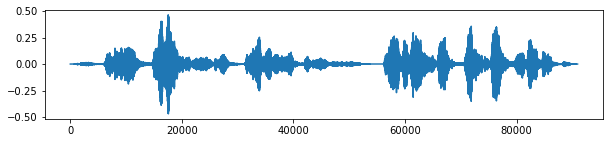

In [8]:
pl.figure(figsize=(10,2))
pl.plot(x)
pl.show()  # ! observe that the x-axis just shows the sample number so far, this is not informative without the sample rate

#### Create time axis

The sample rate in Hz defines, how many audio samples exist per second. If we compute the inverse ($1/f_\mathrm{s}$), we get the duration of each sample in seconds.

In [15]:
print(np.arange(40))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [16]:
number_of_samples = len(x)
print("Number of samples:", number_of_samples)
seconds_per_sample = 1/fs
print("Duration [seconds] of one sample", seconds_per_sample)  # on audio sample corresponds to ~22.7 ms
# let's create a numpy array with the physical time of each audio sample
frames_in_seconds = np.arange(number_of_samples)*seconds_per_sample

Number of samples: 90951
Duration [seconds] of one sample 2.2675736961451248e-05


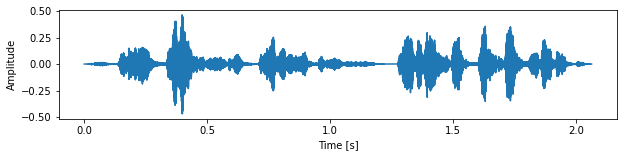

In [17]:
# let's plot the signal again, this time with an interpretable x-axis
pl.figure(figsize=(10,2))
pl.plot(frames_in_seconds, x)
pl.xlabel('Time [s]')
pl.ylabel('Amplitude')
pl.show()

## Tasks

- Try loading the other audio file now!
- Try out some of the commented code.
- You can also try it with the files you looked at in Audacity (export wav files from there). What is different?
- If you load single tracks from one of the Audacity examples, how would you generate a mix in Python?
- Explore the Librosa documentation to see what else is possible. We will come back to some of the possibilities in later labs.